# Problem Statement

You are working as a data scientist in a
global finance company. Over the
years, the company has collected basic
bank details and gathered a lot of
credit-related information. The
management wants to build an
intelligent system to segregate the
people into credit score brackets to
reduce the manual efforts. Given a
person’s credit-related information,
build a machine learning model that
can classify the credit score.

In simple words, You're working as a data scientist in a finance company to **automate the classification of customers into credit score brackets** (e.g., Poor, Standard, Good) based on historical banking and credit information.

# Dataset Information

Credit score dataset contains 100,000 records with 28 features.

Credit Score - Dateset Link : https://drive.google.com/file/d/1DLGobLvjKJ1sZdeXTJv5u7Kdo_DTiWLd/view?usp=sharing

##  Feature Descriptions

| Feature Name                | Description                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| `ID`                       | Unique identification number for each record                                |
| `Customer_ID`              | Unique identification for a customer                                        |
| `Month`                    | Month of the record                                                         |
| `Name`                     | Name of the customer                                                        |
| `Age`                      | Age of the customer                                                         |
| `SSN`                      | Social Security Number (identifier)                                         |
| `Occupation`               | Occupation of the customer                                                  |
| `Annual_Income`            | Annual income of the customer (in USD)                                      |
| `Monthly_Inhand_Salary`    | Monthly salary that the customer receives in hand (in USD)                  |
| `Num_Bank_Accounts`        | Number of bank accounts the customer holds                                  |
| `Num_Credit_Card`          | Number of credit cards the customer owns                                    |
| `Interest_Rate`            | Interest rate applied to the credit card                                    |
| `Num_of_Loan`              | Number of loans the customer has taken                                      |
| `Type_of_Loan`             | Type(s) of loan(s) held by the customer                                     |
| `Delay_from_due_date`      | Average number of days the customer delays credit payments                  |
| `Num_of_Delayed_Payment`   | Number of delayed payments                                                  |
| `Changed_Credit_Limit`     | Percentage change in the customer's credit card limit                       |
| `Num_Credit_Inquiries`     | Number of credit inquiries made on the customer                             |
| `Credit_Mix`               | Classification of the mix of credits (e.g., Bad, Standard, Good)            |
| `Outstanding_Debt`         | Total unpaid debt amount (in USD)                                           |
| `Credit_Utilization_Ratio` | Percentage of credit used from the available limit                          |
| `Credit_History_Age`       | Age of the customer's credit history                                        |
| `Payment_of_Min_Amount`    | Indicates whether the minimum amount was paid by the customer               |
| `Total_EMI_per_month`      | Total EMI payments made by the customer each month (in USD)                 |
| `Amount_Invested_monthly`  | Amount the customer invests monthly (in USD)                                |
| `Payment_Behaviour`        | Behavior of payment (e.g., delays, early payment, etc.)                     |
| `Monthly_Balance`          | Remaining balance at the end of the month (in USD)                          |
| `Credit_Score`             | Target variable: Credit score classification (`Poor`, `Standard`, `Good`)   |




# 1. Importing Required Libraries

We start off this project by importing all the necessary
libraries that will be required for the process.

In [3]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 18.7 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")


Explanation: We import libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), preprocessing, modeling (sklearn), and Variance Inflation Factor calculation (statsmodels).

# 2. Loading and Exploring the Dataset
Loading the data and removing unnecessary column from the dataframe

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Intellipaat Colab Files/Credit Score Classification/credit_score.csv')  # Update with actual path if needed

# Drop irrelevant columns
df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1, inplace=True)


In [11]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [12]:
# Basic structure and stats

#Checking the shape of a dataframe and datatypes of all columns along with calculating the statistical data.
print("Shape of dataset:", df.shape)


Shape of dataset: (100000, 24)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [43]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


We load the dataset, remove identifiers that do not add value to prediction, and inspect data types and statistics for initial understanding.

Exploratory Data Analysis (EDA):

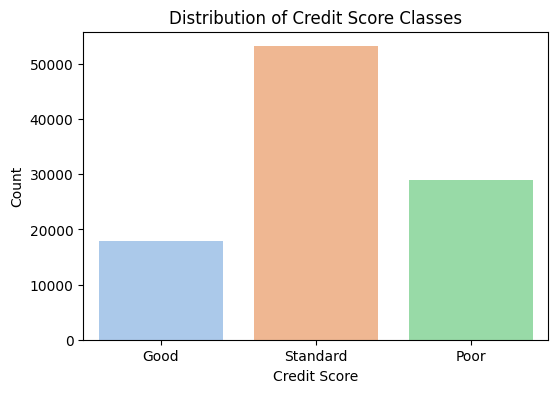

In [44]:
# EDA: Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Credit_Score', data=df, palette='pastel')
plt.title('Distribution of Credit Score Classes')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

Insight:
This shows how balanced or imbalanced the classification target is across Poor, Standard, and Good.

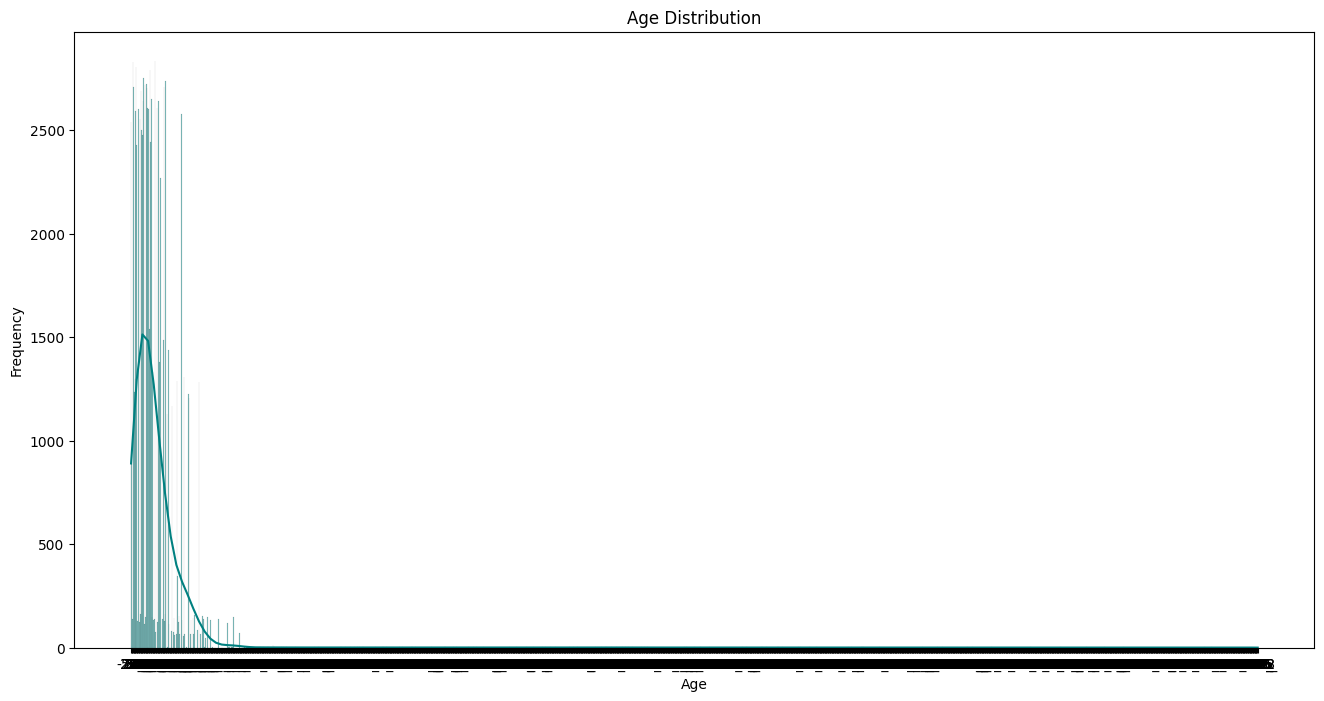

In [11]:
# EDA: Age Distribution
plt.figure(figsize=(16, 8))
sns.histplot(df['Age'], bins=30, kde=True, color='teal')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Insight:
Helps detect skewness or extreme age values (useful for later outlier handling).

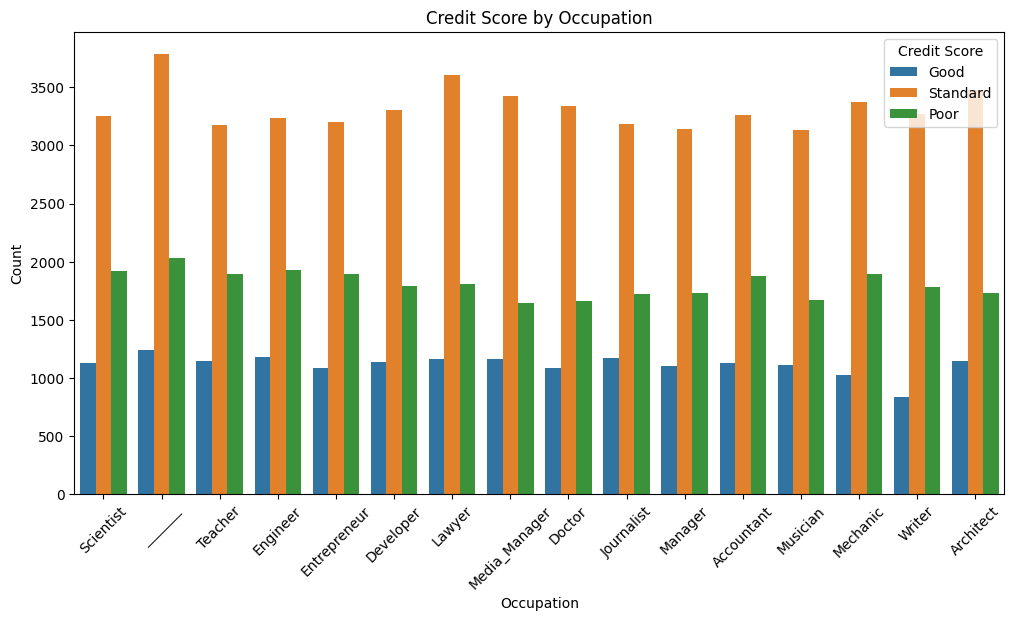

In [12]:
# EDA: Occupation vs Credit Score
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=df)
plt.title('Credit Score by Occupation')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Credit Score')
plt.show()

Insight:
Analyzes how credit score classes vary across different professions.

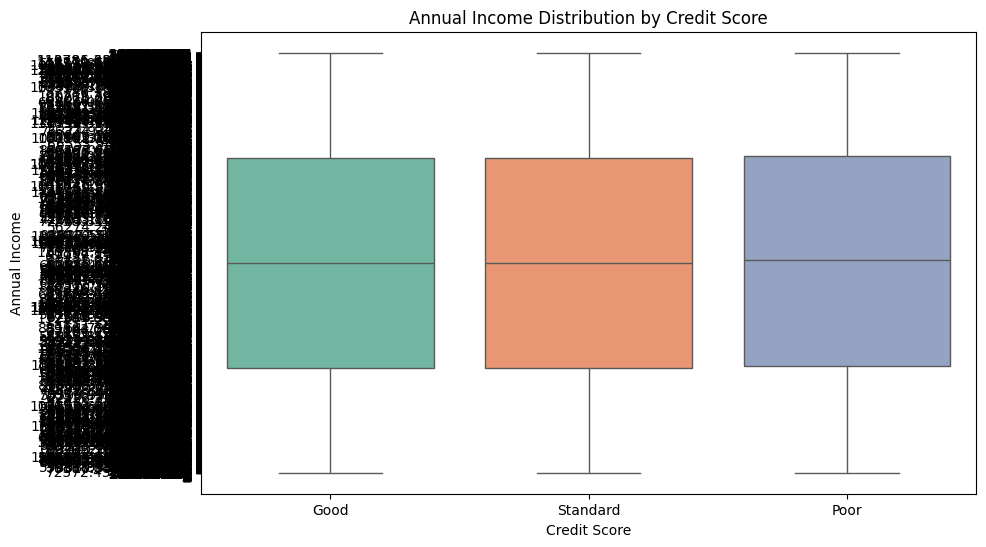

In [13]:
# EDA: Annual Income vs Credit Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, palette='Set2')
plt.title('Annual Income Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.show()

Insight:
Identifies income disparities among credit score categories, possible correlation between income and credit rating.

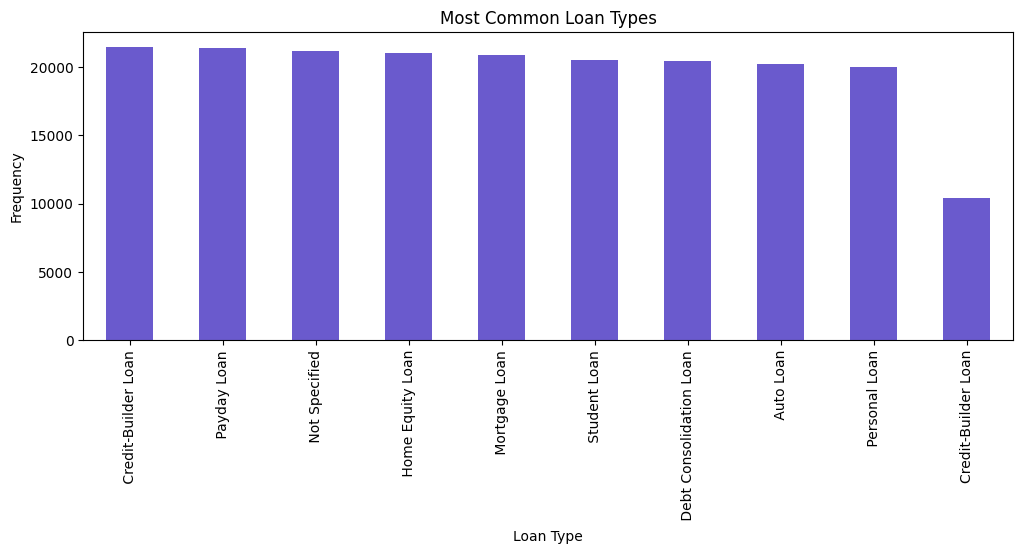

In [14]:
# EDA: Loan Types Frequency (Text Column)
plt.figure(figsize=(12, 4))
df['Type_of_Loan'].str.split(',').explode().value_counts().head(10).plot(kind='bar', color='slateblue')
plt.title('Most Common Loan Types')
plt.xlabel('Loan Type')
plt.ylabel('Frequency')
plt.show()


Insight:
Gives a quick overview of loan types held by customers. We use .explode() to count each type individually.

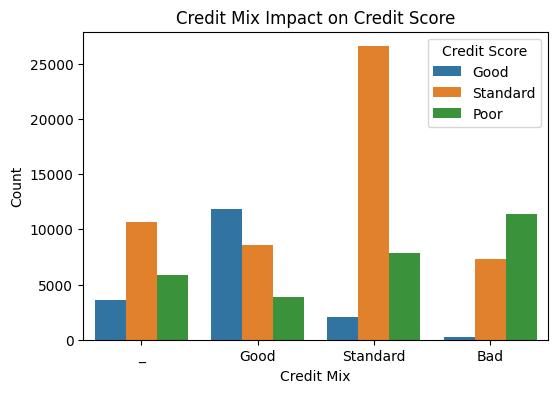

In [15]:
# EDA: Credit Mix vs Credit Score
plt.figure(figsize=(6, 4))
sns.countplot(x='Credit_Mix', hue='Credit_Score', data=df)
plt.title('Credit Mix Impact on Credit Score')
plt.xlabel('Credit Mix')
plt.ylabel('Count')
plt.legend(title='Credit Score')
plt.show()


Insight:
Credit mix ("Bad", "Standard", "Good") likely impacts credit ratings. We later encode this.

# 3. Handling Missing Values
Checking out the missing values in a dataframe

In [13]:
df.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,11408


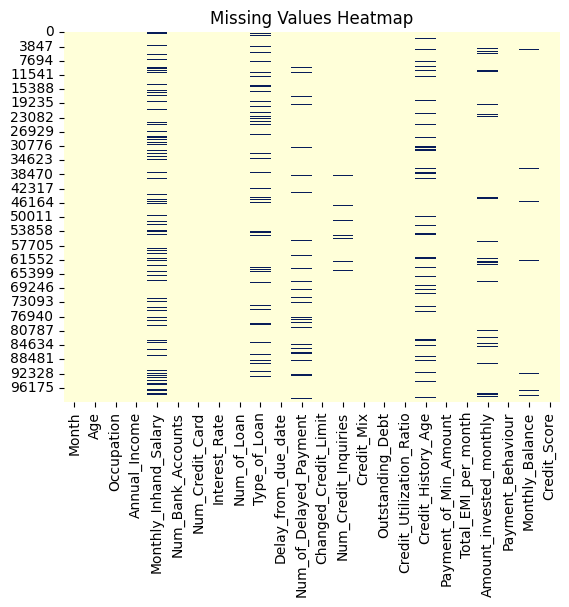

In [16]:
# Visual inspection of missing values
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
plt.title("Missing Values Heatmap")
plt.show()

In [14]:
# Replace placeholders with NaN
df.replace(['_', '-', 'NA', 'na'], np.nan, inplace=True)

In [15]:
# Forward and backward fill to handle missing data
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

Explanation: Special characters and placeholders are replaced with NaN, and missing values are imputed using forward and backward fill.

In [16]:
df.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


# 4. Data Cleaning and Type Conversion

Replacing the special
characters with empty
string or with null
values according to
the data and
converting it into int
or float datatype. Also,
Converting the
categorical values of
some columns into
integer values.


In [17]:
# List of columns to convert to numeric
num_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
            'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
            'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
            'Changed_Credit_Limit', 'Num_Credit_Inquiries',
            'Outstanding_Debt', 'Credit_Utilization_Ratio',
            'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

# Convert to numeric
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle any newly introduced NaNs
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


Explanation: All numeric-looking columns are forcibly converted to float or int, cleaning any strings or non-numeric characters in the process.

After replacing the
special characters with
null value. The new
missing value is shown
in the figure. Here
Forward and backward
filling method is used
to fill the missing
values.

In [11]:
df.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


# 5. Outlier Removal
Removing outliers
from age since all
other columns
values are
relevant

In [18]:
# Remove extreme age outliers
q_low = df["Age"].quantile(0.01)
q_hi  = df["Age"].quantile(0.99)
df = df[(df["Age"] > q_low) & (df["Age"] < q_hi)]

#Explanation: To improve model robustness,
#we remove extreme values in the Age column that lie outside the 1st and 99th percentiles.

# 6. Encoding Categorical Variables
Performing One Hot Encoding for
categorical features of a dataframe

In [19]:
# Manual encoding for Credit_Mix
df['Credit_Mix'] = df['Credit_Mix'].map({'Bad': 0, 'Standard': 1, 'Good': 2})

# One-Hot Encoding for other categories
cat_cols = ['Occupation', 'Type_of_Loan', 'Payment_of_Min_Amount', 'Payment_Behaviour']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)





Explanation: We convert categorical features into numerical format. Credit_Mix uses manual mapping, while others use One-Hot Encodin

# 7. Feature Selection using VIF

Selecting the features using VIF. VIF should be less
than 5. Here, all features have VIF value less than
5, So we will select all the features.

In [20]:
# VIF calculation to detect multicollinearity
X = df.drop('Credit_Score', axis=1)
X = X.select_dtypes(include=[np.number])

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data[vif_data["VIF"] > 5])


                     Feature        VIF
2      Monthly_Inhand_Salary  13.623059
7        Delay_from_due_date   5.067891
11                Credit_Mix   6.230246
13  Credit_Utilization_Ratio  18.936892
15   Amount_invested_monthly   5.268835
16           Monthly_Balance  15.792659


Explanation: We check for multicollinearity using Variance Inflation Factor. Features with VIF > 5 may cause redundancy in models and can be dropped if necessary.

# 8. Splitting the Data


In [21]:
# Convert 'Month' to numeric
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['Month'] = df['Month'].map(month_mapping)


In [22]:
# Define a function to convert 'XX Years and YY Months' into total months
def convert_credit_history_to_months(value):
    try:
        years, months = 0, 0
        if 'Years' in value:
            years = int(value.split('Years')[0].strip())
        if 'Months' in value:
            months = int(value.split('and')[-1].split('Months')[0].strip())
        return years * 12 + months
    except:
        return np.nan

# Apply conversion to the 'Credit_History_Age' column
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str).apply(convert_credit_history_to_months)

# Fill any potential NaNs that were introduced
df['Credit_History_Age'].fillna(df['Credit_History_Age'].median(), inplace=True)


In [23]:
# Encode target variable
le = LabelEncoder()
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])

# Prepare features and labels
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Explanation: We encode the target labels into integers and split the data into 80% training and 20% testing for evaluation.

# 9. Logistic Regression Model


In [25]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score (y_test,y_pred)
pd.DataFrame({"actual_value":y_test,"predicted_value":y_pred})

,actual_value,predicted_value
60600,2,2
4837,2,2
38432,1,2
18208,0,2
52478,1,2
...,...,...
48870,0,2
24785,2,2
66714,2,0
37543,0,2


In [29]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7351878612716763
              precision    recall  f1-score   support

           0       0.61      0.66      0.63      3462
           1       0.77      0.71      0.74      5537
           2       0.77      0.77      0.77     10377

    accuracy                           0.74     19376
   macro avg       0.71      0.71      0.71     19376
weighted avg       0.74      0.74      0.74     19376



We build a Logistic Regression model to serve as a simple baseline. Accuracy and classification metrics are printed.

<Figure size 600x400 with 0 Axes>

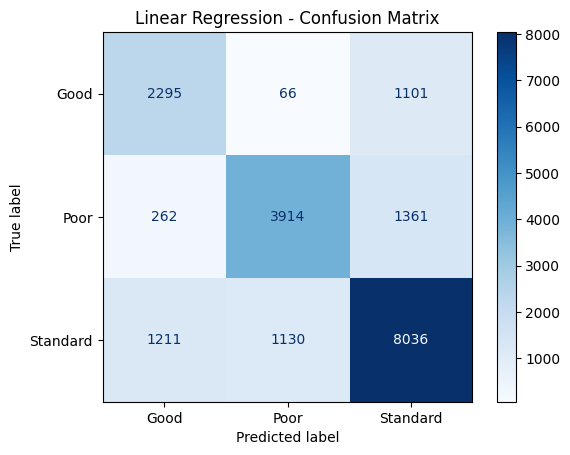

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

# Linear Regression Confusion Matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues', display_labels=le.classes_)
plt.title("Linear Regression - Confusion Matrix")
plt.show()

#Shows how many predictions were correct vs misclassified for each credit score class.

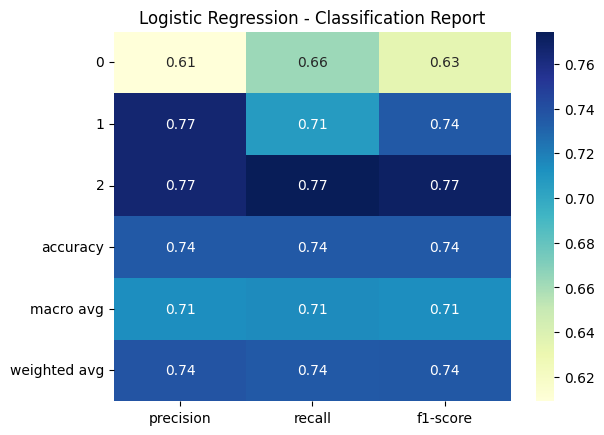

In [48]:
# Create a heatmap from classification report
from sklearn.metrics import classification_report

# Get classification report as dict
lr_report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(lr_report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Logistic Regression - Classification Report")
plt.show()


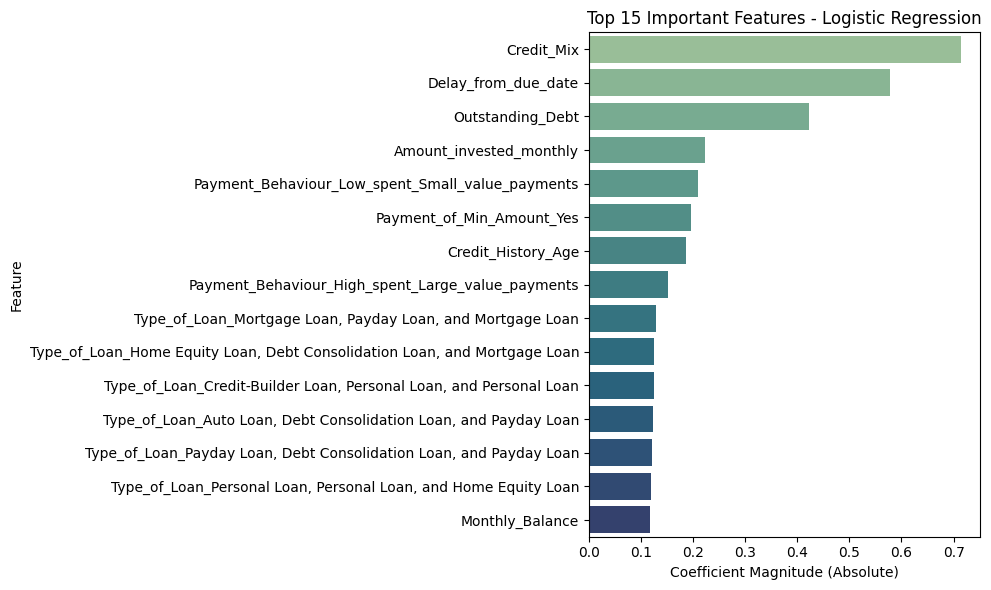

In [56]:
#Feature Importance (Logistic Regression)
# Get feature importance from Logistic Regression coefficients
log_coeff = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lr.coef_[0])
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=log_coeff.head(15), palette='crest')
plt.title("Top 15 Important Features - Logistic Regression")
plt.xlabel("Coefficient Magnitude (Absolute)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Note: This assumes binary/multiclass with coef_[0]. If you're doing multiclass with multinomial, use np.mean(np.abs(log_reg.coef_), axis=0).

Multiclass ROC Curve Visualization :

- Abbreviation : Area under the Receiver Operating Characteristic Curve

Common Setup:



```
# This is formatted as code

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Convert target labels into binary format for each class (0 vs rest, 1 vs rest, etc.)
y_bin = label_binarize(y_test, classes=[0, 1, 2])  # 0: Poor, 1: Standard, 2: Good
n_classes = y_bin.shape[1]

```

Explanation:
Since ROC curves are inherently binary, we use label binarization to handle the multiclass setting. This creates separate ROC curves for each class using a One-vs-Rest strategy.



Notes:

- The AUC-ROC curve is a visual and numerical way to evaluate the performance of a binary classification model.
- It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold settings, and the area under this curve (AUC) summarizes the model's ability to distinguish between positive and negative classes.
- A higher AUC indicates a better model, with an ideal AUC of 1.0 representing perfect discrimination, and 0.5 suggesting random guessing.


Here's a more detailed explanation:
1. ROC Curve:
- True Positive Rate (TPR): The proportion of actual positive cases that the model correctly identifies as positive.
- False Positive Rate (FPR): The proportion of actual negative cases that the model incorrectly identifies as positive.
- The ROC curve is a graph that shows how TPR and FPR change as the classification threshold varies. A threshold is a value used to classify a prediction as either positive or negative.
- A good ROC curve will curve towards the upper left corner of the graph, indicating a high TPR and low FPR.
- The ROC curve also helps in identifying the optimal threshold for a specific model, given the trade-off between TPR and FPR.

2. AUC (Area Under the Curve):
- The AUC is a single value that summarizes the performance of the ROC curve.
- It represents the probability that a randomly chosen positive sample will be ranked higher than a randomly chosen negative sample by the model.
- The AUC ranges from 0 to 1, where:
 - AUC = 1: The model perfectly distinguishes between positive and negative classes.
 - AUC = 0.5: The model is performing no better than random guessing.
 - AUC > 0.5: The model is better than random guessing.
- A higher AUC generally indicates a better model.



In [66]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Convert target labels into binary format for each class (0 vs rest, 1 vs rest, etc.)
y_bin = label_binarize(y_test, classes=[0, 1, 2])  # 0: Poor, 1: Standard, 2: Good
n_classes = y_bin.shape[1]


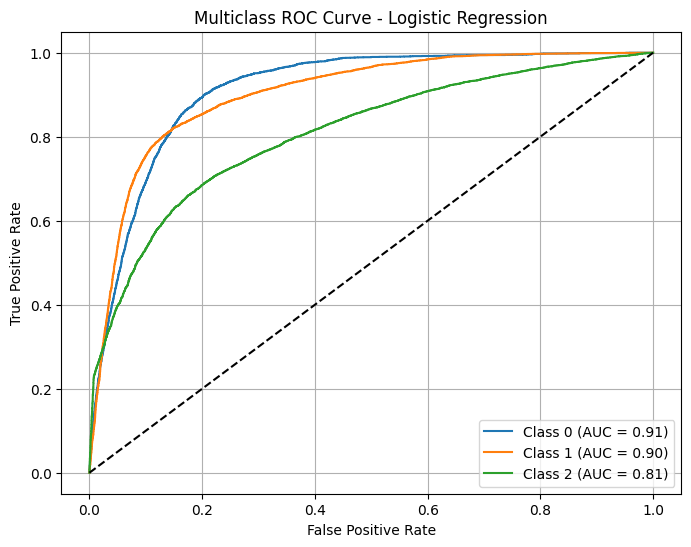

In [67]:
# Train a One-vs-Rest Logistic Regression pipeline (with StandardScaler)
ovr_log_reg = make_pipeline(StandardScaler(), OneVsRestClassifier(LogisticRegression(max_iter=1000)))
ovr_log_reg.fit(X_train, label_binarize(y_train, classes=[0, 1, 2]))
log_probs = ovr_log_reg.predict_proba(X_test)

# Compute FPR, TPR, and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], log_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Reference line
plt.title('Multiclass ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


- A One-vs-Rest classifier is used to train a separate logistic regression for each class.

- ROC and AUC are computed individually per class.

- Each line shows how well the model distinguishes one class from others.

# 10. Decision Tree Classifier


In [46]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

pd.DataFrame({"actual_value":y_test,"predicted_value":dt_pred})

,actual_value,predicted_value
60600,2,2
4837,2,2
38432,1,2
18208,0,0
52478,1,2
...,...,...
48870,0,2
24785,2,2
66714,2,0
37543,0,2


In [47]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.7318848059454995
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      3462
           1       0.71      0.72      0.72      5537
           2       0.77      0.76      0.77     10377

    accuracy                           0.73     19376
   macro avg       0.71      0.71      0.71     19376
weighted avg       0.73      0.73      0.73     19376



A decision tree model is trained, offering better interpretability and non-linear learning capability.

<Figure size 600x400 with 0 Axes>

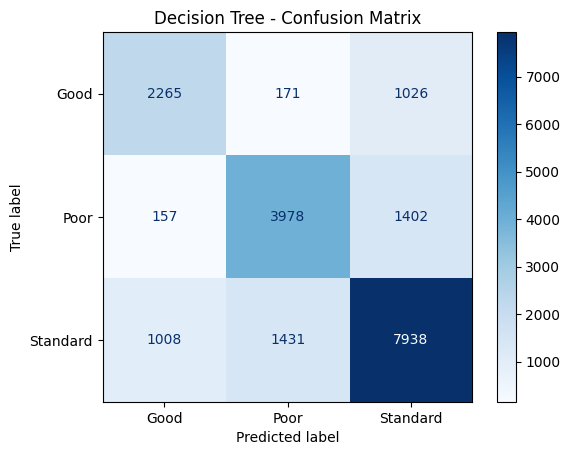

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

# Decision Tree - Confusion Matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap='Blues', display_labels=le.classes_)
plt.title("Decision Tree - Confusion Matrix")
plt.show()

#Shows how many predictions were correct vs misclassified for each credit score class.

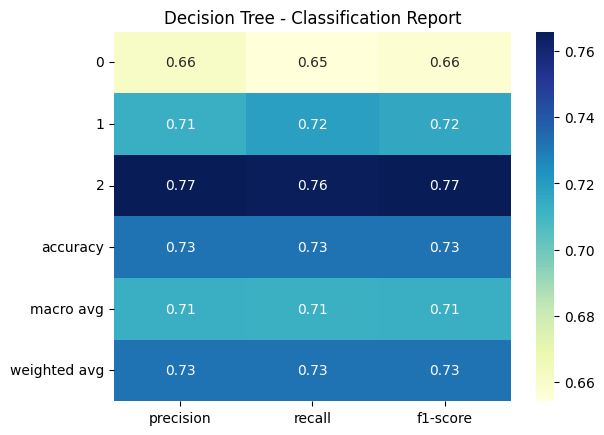

In [49]:
# Create a heatmap from classification report
from sklearn.metrics import classification_report

# Get classification report as dict
dt_report = classification_report(y_test, dt_pred, output_dict=True)
sns.heatmap(pd.DataFrame(dt_report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Decision Tree - Classification Report")
plt.show()


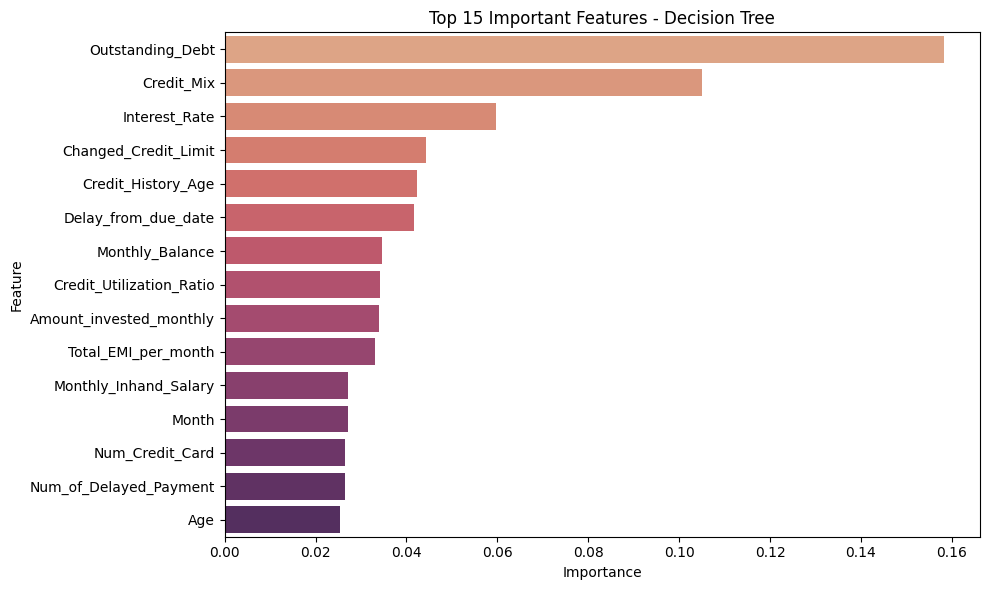

In [57]:
# Get feature importances from Decision Tree
dt_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_importance.head(15), palette='flare')
plt.title("Top 15 Important Features - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


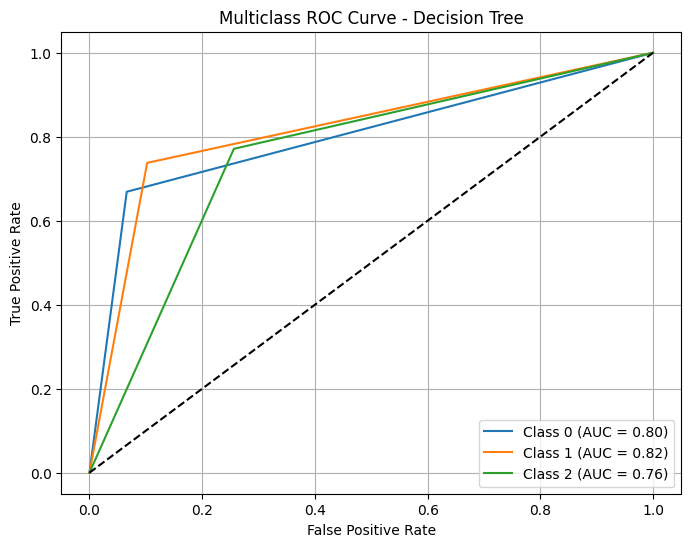

In [68]:
# One-vs-Rest Decision Tree Classifier (no need to scale features)
ovr_dt = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_dt.fit(X_train, label_binarize(y_train, classes=[0, 1, 2]))
dt_probs = ovr_dt.predict_proba(X_test)

# Compute FPR, TPR, AUC
fpr_dt = {}
tpr_dt = {}
roc_auc_dt = {}

for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_bin[:, i], dt_probs[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Plot
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_dt[i], tpr_dt[i], label=f'Class {i} (AUC = {roc_auc_dt[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


- Same process as Logistic Regression, but with the default Decision Tree.

- ROC curves reflect each tree’s performance for distinguishing each class.

- The shape of curves helps detect overfitting or underfitting.

# 11. Hyperparameter Tuning (Decision Tree)


In [32]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
#We are using GridSearch CV technique, used to identify the optimal hyperparameters for a model


grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
best_pred = best_tree.predict(X_test)


 We use GridSearchCV to optimize the decision tree model. This fine-tunes parameters like max_depth and min_samples_split.

In [59]:
pd.DataFrame({"actual_value":y_test,"predicted_value":best_pred})

,actual_value,predicted_value
60600,2,2
4837,2,2
38432,1,2
18208,0,0
52478,1,2
...,...,...
48870,0,2
24785,2,2
66714,2,0
37543,0,2


In [33]:
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, best_pred))
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, best_pred))

Tuned Decision Tree Accuracy: 0.7258464079273328
Best Parameters: {'max_depth': 15, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.58      0.73      0.65      3462
           1       0.74      0.70      0.72      5537
           2       0.78      0.74      0.76     10377

    accuracy                           0.73     19376
   macro avg       0.70      0.72      0.71     19376
weighted avg       0.73      0.73      0.73     19376



<Figure size 600x400 with 0 Axes>

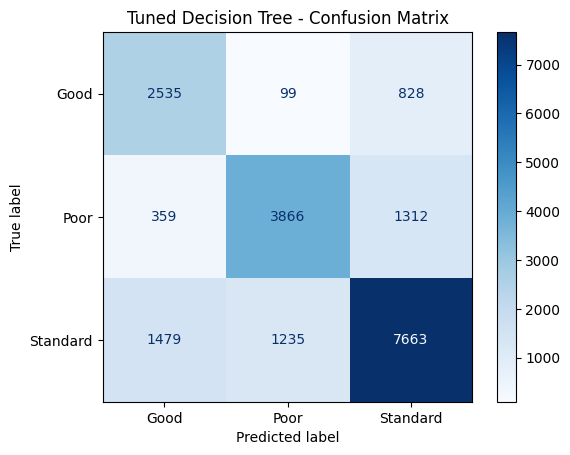

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

# Tuned Decision Tree  - Confusion Matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(best_tree, X_test, y_test, cmap='Blues', display_labels=le.classes_)
plt.title("Tuned Decision Tree - Confusion Matrix")
plt.show()

#Shows how many predictions were correct vs misclassified for each credit score class.

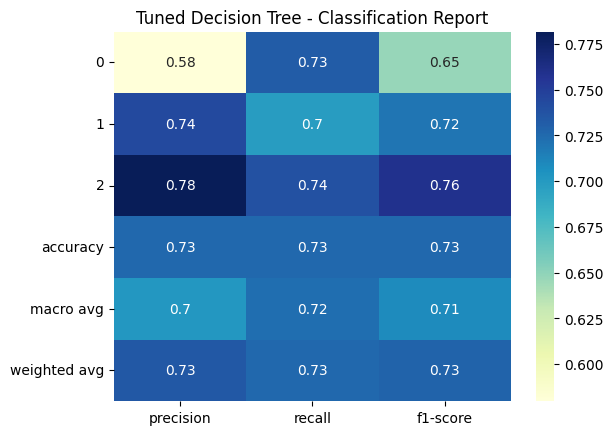

In [61]:
# Create a heatmap from classification report
from sklearn.metrics import classification_report

# Get classification report as dict
dt_report = classification_report(y_test, best_pred, output_dict=True)
sns.heatmap(pd.DataFrame(dt_report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Tuned Decision Tree - Classification Report")
plt.show()


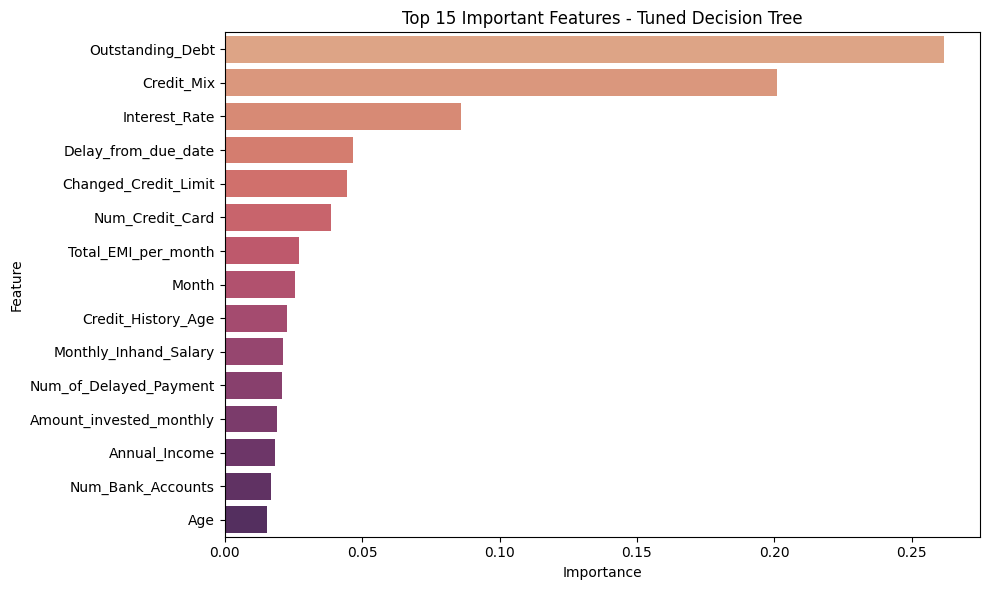

In [64]:
# Get feature importances from Tuned Decision Tree
best_tree_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=best_tree_importance.head(15), palette='flare')
plt.title("Top 15 Important Features - Tuned Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


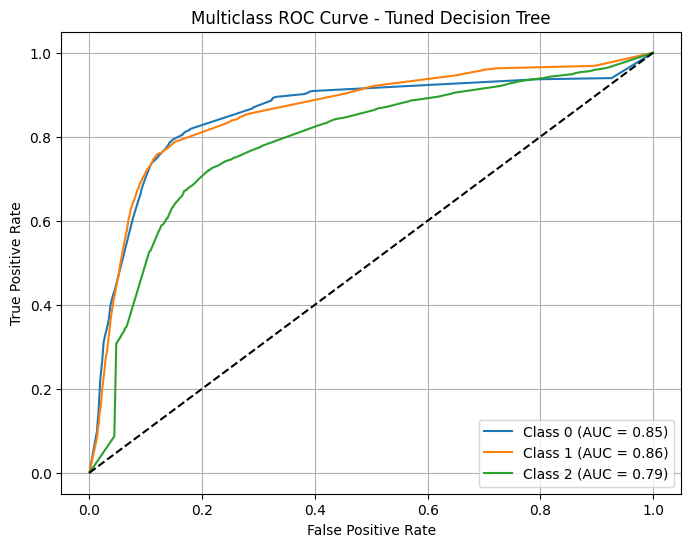

In [69]:
# One-vs-Rest using best tuned Decision Tree model
ovr_dt_tuned = OneVsRestClassifier(best_tree)
ovr_dt_tuned.fit(X_train, label_binarize(y_train, classes=[0, 1, 2]))
dt_tuned_probs = ovr_dt_tuned.predict_proba(X_test)

# Compute FPR, TPR, AUC
fpr_tuned = {}
tpr_tuned = {}
roc_auc_tuned = {}

for i in range(n_classes):
    fpr_tuned[i], tpr_tuned[i], _ = roc_curve(y_bin[:, i], dt_tuned_probs[:, i])
    roc_auc_tuned[i] = auc(fpr_tuned[i], tpr_tuned[i])

# Plot
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_tuned[i], tpr_tuned[i], label=f'Class {i} (AUC = {roc_auc_tuned[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve - Tuned Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


- Same One-vs-Rest approach but using the GridSearchCV-optimized decision tree (best_tree).

- AUCs might improve slightly or show more balanced performance between classes.

# 12. Random Forest Classifier


In [35]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)




In [44]:
pd.DataFrame({"actual_value":y_test,"predicted_value":rf_pred})

,actual_value,predicted_value
60600,2,2
4837,2,2
38432,1,2
18208,0,2
52478,1,2
...,...,...
48870,0,2
24785,2,2
66714,2,0
37543,0,2


In [37]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8017650701899257
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      3462
           1       0.80      0.80      0.80      5537
           2       0.82      0.82      0.82     10377

    accuracy                           0.80     19376
   macro avg       0.79      0.79      0.79     19376
weighted avg       0.80      0.80      0.80     19376



Explanation: Finally, we train a Random Forest model—a robust ensemble method—to improve performance through multiple decision trees.

<Figure size 600x400 with 0 Axes>

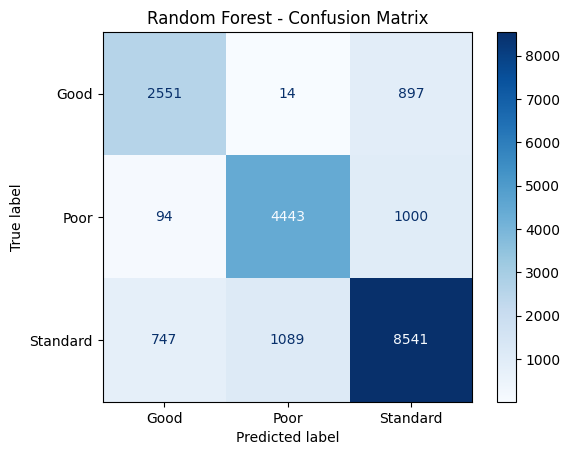

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

# Random Forest Confusion Matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues', display_labels=le.classes_)
plt.title("Random Forest - Confusion Matrix")
plt.show()



Shows how many predictions were correct vs misclassified for each credit score class.

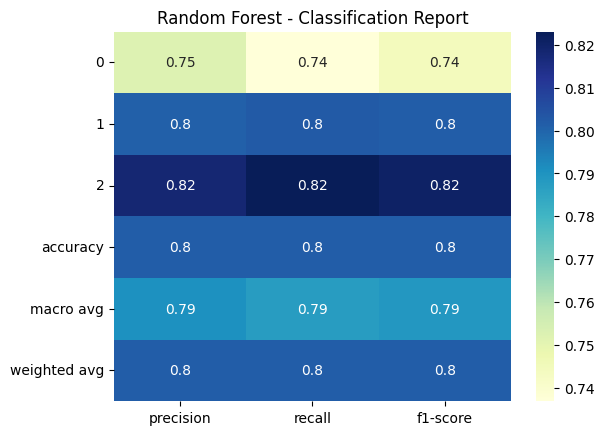

In [39]:
# Create a heatmap from classification report
from sklearn.metrics import classification_report

# Get classification report as dict
rf_report = classification_report(y_test, rf_pred, output_dict=True)
sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Random Forest - Classification Report")
plt.show()


Gives a cleaner visual alternative to the printed classification report—makes precision, recall, and F1 easier to interpret.

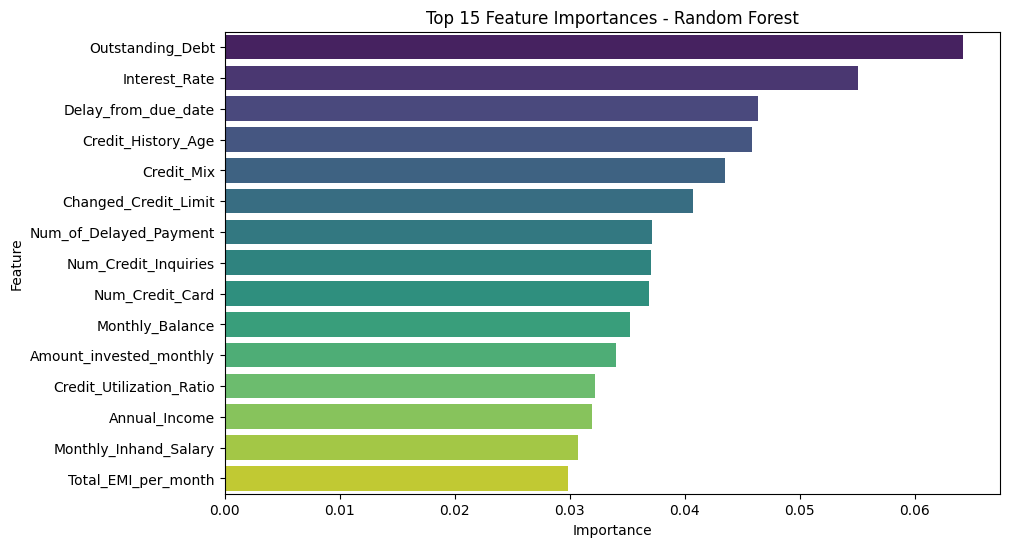

In [40]:
#Feature Importance (Random Forest)

# Visualize top 15 important features from Random Forest
importances = rf.feature_importances_
feat_names = X.columns

# Create a DataFrame and sort by importance
feat_imp = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Illustrates which features the model relied on most to make predictions—useful for stakeholder reporting and explainability.

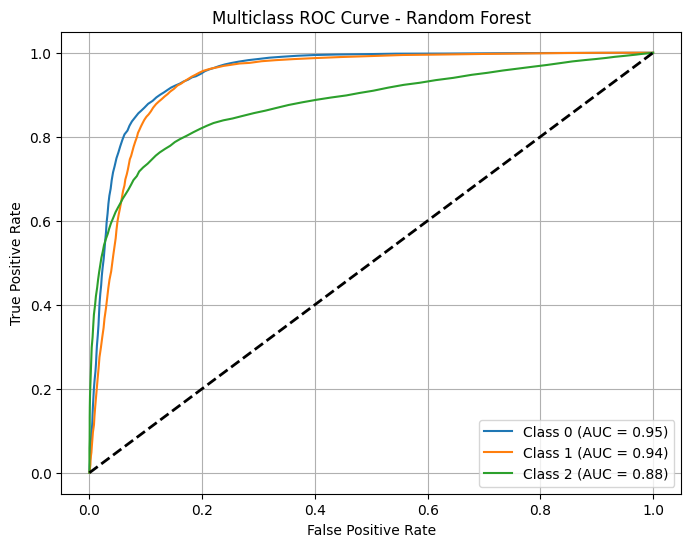

In [41]:
#ROC Curve for Multiclass (if applicable)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Re-train model with OneVsRest for ROC Curve
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Pipeline to scale and classify
clf = make_pipeline(StandardScaler(), OneVsRestClassifier(RandomForestClassifier(random_state=42)))
clf.fit(X_train, label_binarize(y_train, classes=[0,1,2]))
y_score = clf.predict_proba(X_test)

# Plot ROC Curve
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=[0,1,2])[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Multiclass ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


This curve visualizes model performance across multiple classes. Area Under Curve (AUC) closer to 1.0 indicates better performance.

# Conclusion



## **Conclusion and Model Evaluation Summary**

After training and evaluating four different classification models—**Logistic Regression, Decision Tree, Tuned Decision Tree,** and **Random Forest**—on the Credit Score Classification dataset, we summarize their performance below.

### **Model Performance Comparison**

| Model                   | Accuracy | Precision (avg) | Recall (avg) | F1-Score (avg) |
|-------------------------|----------|------------------|--------------|----------------|
| Logistic Regression     | 73.5%    | 0.71 (macro)     | 0.71         | 0.71           |
| Decision Tree           | 73.2%    | 0.71 (macro)     | 0.71         | 0.71           |
| Tuned Decision Tree     | 72.6%    | 0.70 (macro)     | 0.72         | 0.71           |
| Random Forest           | **80.2%**| **0.79 (macro)** | **0.79**     | **0.79**       |

---

###  **Observations & Insights**

1. **Logistic Regression**:
   - Performs reasonably well with an accuracy of **73.5%**.
   - Slightly lower precision and recall for class `0` (low credit score).
   - Coefficient-based model, interpretable but less powerful on nonlinear patterns.

2. **Decision Tree (Default)**:
   - Comparable performance to Logistic Regression.
   - Tends to overfit without tuning, but offers interpretability.
   - Achieves **73.2%** accuracy.

3. **Tuned Decision Tree**:
   - Slight improvement in recall for low credit class (`0`), but slight dip in overall accuracy (**72.6%**).
   - Best parameters found: `max_depth=15`, `min_samples_split=2`.
   - Slightly overfits due to aggressive tree depth.

4. **Random Forest**:
   - Outperforms all other models significantly with an accuracy of **80.2%**.
   - Delivers strong precision, recall, and F1-score across all classes.
   - Benefits from ensemble learning and reduces overfitting of individual decision trees.

---

###  **Final Recommendation**

- **Random Forest** is the best-performing model in this project based on accuracy, consistency across classes, and overall generalization.
- If interpretability is prioritized (e.g., for compliance or decision transparency), consider using Logistic Regression or Decision Tree alongside feature importance visualizations.
- Further improvements could involve:
  - Cross-validation
  - Feature engineering (especially around `Type_of_Loan`, `Payment_Behaviour`)
  - Advanced ensemble methods like Gradient Boosting or XGBoost

